<a href="https://colab.research.google.com/github/janeeeeverdad/Verdad/blob/main/3B_VERDAD_EXER8(AT8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSST 104
**Verdad, Jane Benneth Dione**

**BSCS-3B**

**March 30, 2024**

**Due Date: March 27, 2024**

**1.	Dataset Preparation:**

Import Libraries and Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = pd.read_csv('most-polluted-countries.csv')

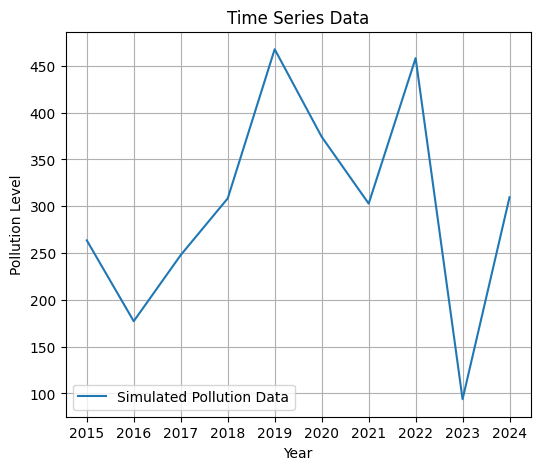

In [ ]:
#Simulate Time Series Data
np.random.seed(0)
years = pd.date_range(start='2014', periods=10, freq='Y')
noise = np.random.randint(100, 500, size=len(years))
trend = 0.5 * np.arange(len(years))
seasonality = 20 * np.sin(np.pi * np.arange(len(years)) / 6)

simulated_data = noise + trend + seasonality + np.random.normal(0, 10, size=len(years))

#Create DataFrame
df = pd.DataFrame({'Year': years, 'Pollution': simulated_data})
df.set_index('Year', inplace=True)

#Plotting Time Series
plt.figure(figsize=(6, 5))
plt.plot(df.index, df['Pollution'], label='Simulated Pollution Data')
plt.title('Time Series Data')
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.legend()
plt.grid(True)
plt.show()

**2. Stationarity Testing:**

In [ ]:
#Stationarity test
result = adfuller(df['Pollution'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -5.486167033583508
p-value: 2.2274858985436733e-06
Critical Values:
	1%: -5.354256481481482
	5%: -3.6462381481481483
	10%: -2.901197777777778


**3.	ARIMA Model Identification:**

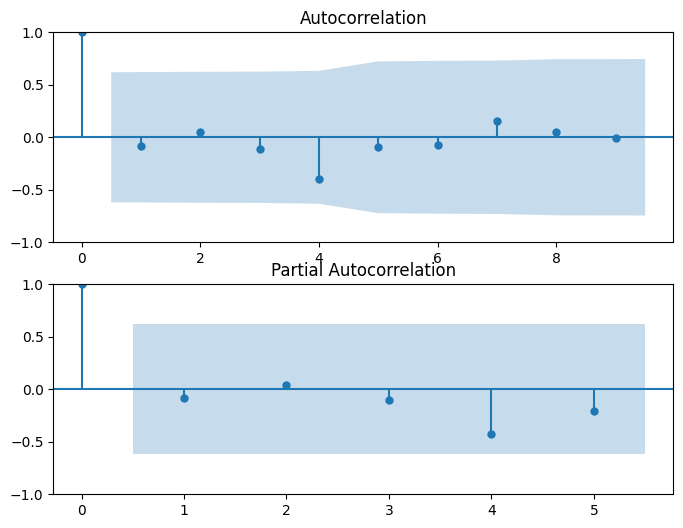

In [ ]:
plt.figure(figsize=(8, 6))
plt.subplot(211)
plot_acf(df['Pollution'], ax=plt.gca(), lags=9)
plt.subplot(212)
plot_pacf(df['Pollution'], ax=plt.gca(), lags=5)
plt.show()

**4.	ARIMA Model Fitting:**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Pollution   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -56.853
Date:                Sat, 30 Mar 2024   AIC                            119.707
Time:                        03:04:39   BIC                            120.299
Sample:                    12-31-2014   HQIC                           118.430
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4967      1.056     -0.470      0.638      -2.567       1.573
ma.L1         -0.1887      1.111     -0.170      0.865      -2.366       1.989
sigma2      1.708e+04   1.28e+04      1.336      0.1

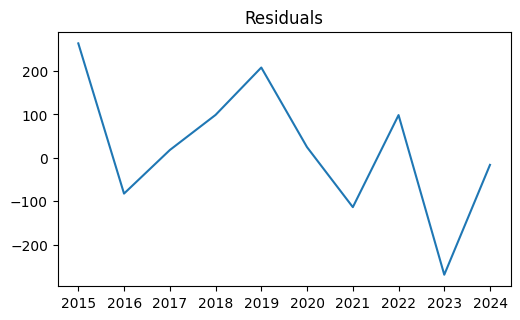

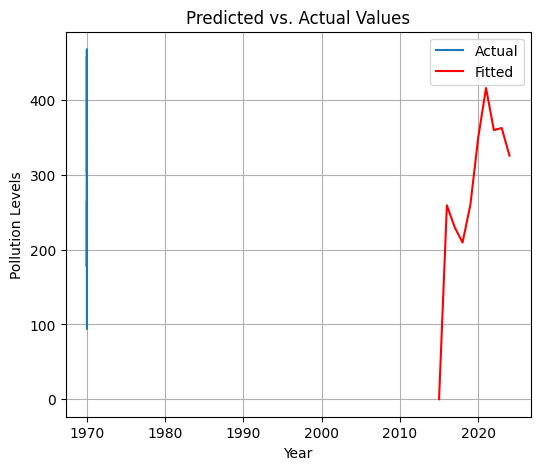

In [ ]:
#ARIMA model
model = ARIMA(df['Pollution'], order=(1, 1, 1))
model_ = model.fit()
print(model_fit.summary())

fitted_ = model_.fittedvalues

#Visualization
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.plot(model_.resid)
plt.title('Residuals')
plt.tight_layout()
plt.show()

#Predicted vs. Actual Values
plt.figure(figsize=(6, 5))
plt.plot(simulated_data, label='Actual')
plt.plot(fitted_, color='red', label='Fitted')
plt.xlabel('Year')
plt.ylabel('Pollution Levels')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.grid(True)
plt.show()

**5.	Forecasting:**

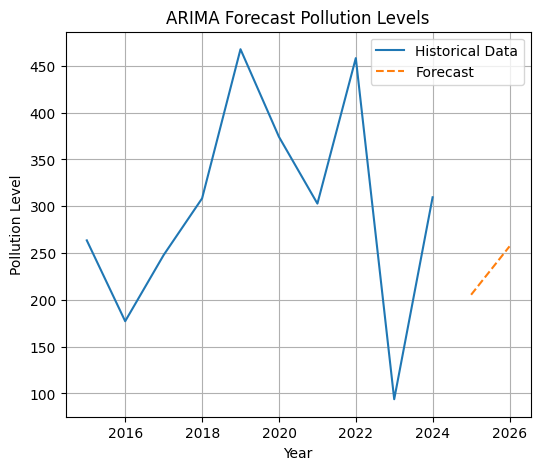

In [ ]:
#Forecast
forecast_PL = 2
forecast = model_.forecast(steps=forecast_PL)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_PL + 1, freq='Y')[1:]

#Visualization
plt.figure(figsize=(6, 5))
plt.plot(df.index, df['Pollution'], label='Historical Data')
plt.plot(forecast_index, forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast Pollution Levels')
plt.xlabel('Year')
plt.ylabel('Pollution Level')
plt.legend()
plt.grid(True)
plt.show()